In [1]:
import fair
fair.__version__

import numpy as np

In [2]:
# Retrieve radiative forcing data
rf_a_file = './fair/Forcing Data/rf_anthro_1750_2016.csv'
rf_n_file = './fair/Forcing Data/rf_nat_1750_2016.csv'
rf_t_file = './fair/Forcing Data/rf_total_1750_2016.csv'

rf_a_data = np.genfromtxt(rf_a_file,delimiter=',')
rf_n_data = np.genfromtxt(rf_n_file,delimiter=',')
rf_t_data = np.genfromtxt(rf_t_file,delimiter=',')

rf_t_unord = np.transpose(rf_t_data)
rf_n_unord = np.transpose(rf_n_data)
rf_a_unord = np.transpose(rf_a_data)

no_of_rf = rf_t_unord[:,0].size
length_of_rf = rf_t_unord[0].size

# Order rf_t values
fv = np.zeros(no_of_rf)

for x in range(0,no_of_rf):
    fv[x] = rf_t_unord[x,-1]
    
fv_sorted = np.sort(fv)

arrangement = np.zeros(no_of_rf)

for x in range(0,no_of_rf):
    arrangement[x] = fv_sorted.tolist().index(fv[x])

rf_t= np.zeros([no_of_rf,length_of_rf])

for x in range(0,no_of_rf):
    rf_t[int((arrangement[x])),:] = rf_t_unord[x,:]

In [3]:
# Set emissions to zero
emissions = np.zeros(length_of_rf)

# Create TCR and ECS array
TCR = np.arange(0.5,4.5,0.1)
ECS = TCR*1.5

no_of_tcr = TCR.size

# Create input parameter array with above defined TCR and ECS values
input_params_in=np.array([0.33,0.41,1.6,2.75,239.0,4.1,0.2173,0.2240,0.2824,0.2763,1000000,394.4,36.54,4.304,100.0,32.40,0.019,4.165,3.74,278.0,2.123,97.0])

input_params = np.zeros([no_of_tcr,22])

for i in range(0,no_of_tcr):
    for j in range(0,22):
        input_params[i,j] = input_params_in[j]

input_params[...,2] = TCR
input_params[...,3] = ECS

In [4]:
import time
start_time = time.time()
C,T = fair.forward.fair_scm(emissions=emissions,
                                    other_rf=rf_t,
                                    input_params=input_params)

---------- Run time was 1 minute and 4 seconds ----------.


<module 'matplotlib.style' from '/Users/OllieBraddy/anaconda/lib/python2.7/site-packages/matplotlib/style/__init__.pyc'>


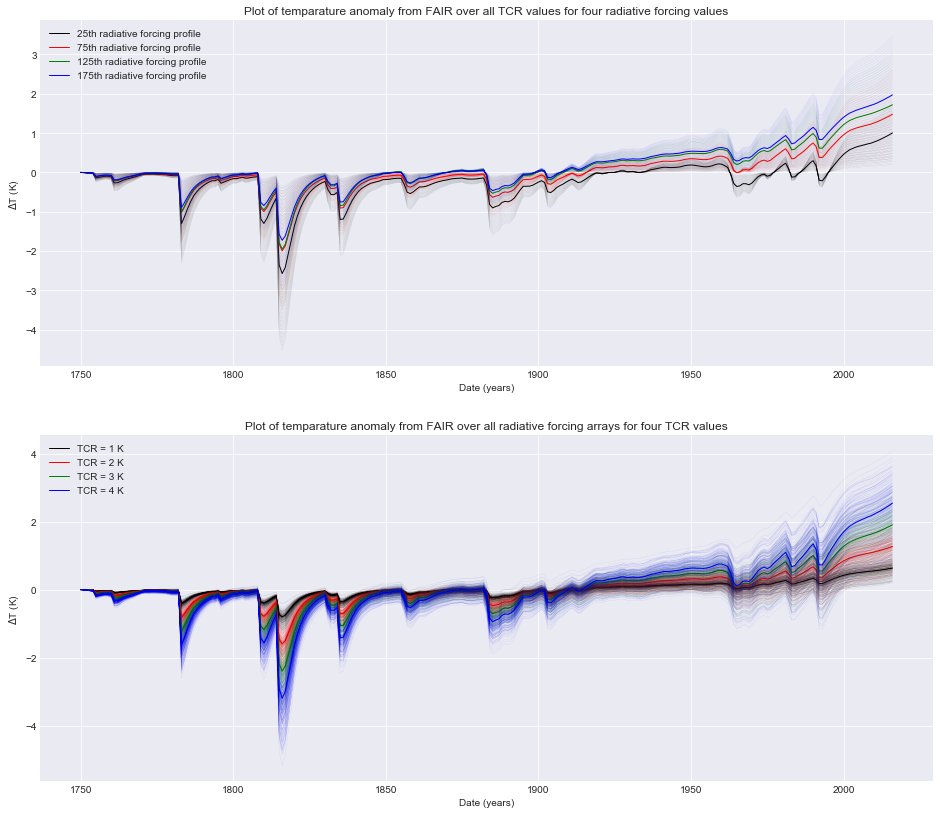

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 16, 5
print plt.style

# Plot temperature profiles
plt.rcParams['figure.figsize'] = 16, 14
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
colours = ['black','red','green','blue']

for y in range(0,4):
    ax1.plot(range((2017-length_of_rf),2017),T[((no_of_rf/4)*y + no_of_rf/8),no_of_tcr/2,:],color=colours[y],linewidth=1,label='%sth radiative forcing profile'%((no_of_rf/4)*y + no_of_rf/8))
    ax2.plot(range((2017-length_of_rf),2017),T[no_of_rf/2,((no_of_tcr/4)*y + no_of_tcr/8),:],color=colours[y],linewidth=1,label='TCR = %s K'%(y+1))
    for x in range(0,no_of_tcr):
        ax1.plot(range(1750,1750+267),T[((no_of_rf/4)*y + no_of_rf/8),x,:],color=colours[y],linewidth=0.03)
    for x in range(0,no_of_rf):
        ax2.plot(range((2017-length_of_rf),2017),T[x,((no_of_tcr/4)*y + no_of_tcr/8),:],color=colours[y],linewidth=0.03)
        
ax1.set_ylabel('$\Delta$T (K)')
ax1.set_xlabel('Date (years)')
ax1.legend() 
ax1.set_title('Plot of temparature anomaly from FAIR over all TCR values for four radiative forcing values')
ax2.set_ylabel('$\Delta$T (K)')
ax2.set_xlabel('Date (years)')
ax2.legend()
ax2.set_title('Plot of temparature anomaly from FAIR over all radiative forcing arrays for four TCR values')